#Importando base de dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv("tips.csv")

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


## total_bill = Valor total da conta, tip = valor da gorjeta, dessert= se pediu sobremesa, day = dia, time = periodo, size = quantas pessoas

In [3]:
dados = pd.read_csv('tips.csv')

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#Tradução

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip':'gorjeta', 
    'dessert':'sobremesa', 
    'day':'dia_da_semana', 
    'time':'hora_do_dia', 
    'size':'total_de_pessoas'
}

In [7]:
type(dados)

pandas.core.frame.DataFrame

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao ={
    'No': 'Não',
    'Yes': 'Sim'
}

In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [13]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [14]:
dias_trad = {
    'Sun':'Domingo',
    'Sat':'Sábado', 
    'Thur':'Quinta', 
    'Fri':'Sexta'
}

In [15]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias_trad)

In [16]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Dinner,3
240,27.18,2.00,Sim,Sábado,Dinner,2
241,22.67,2.00,Sim,Sábado,Dinner,2
242,17.82,1.75,Não,Sábado,Dinner,2


In [17]:
hora={
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [18]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [19]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


#Importando Seaborn

In [20]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 22.8 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [21]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Análise 1 - Valor da conta e gorjeta

In [22]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

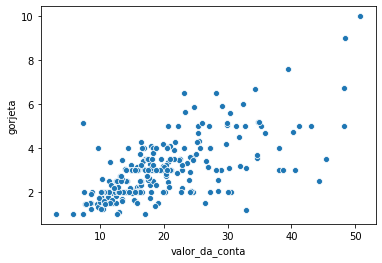

In [23]:
sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [24]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

#Criando o campo porcentagem

In [25]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [26]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [27]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [28]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [29]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


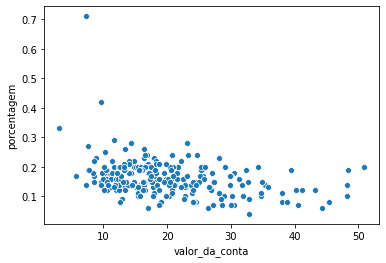

In [30]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

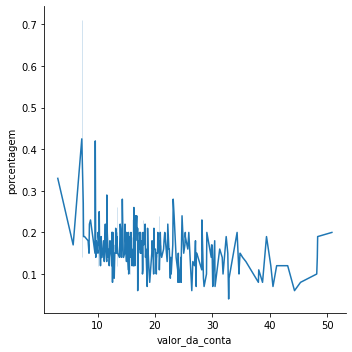

In [31]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind = 'line', data=gorjetas)

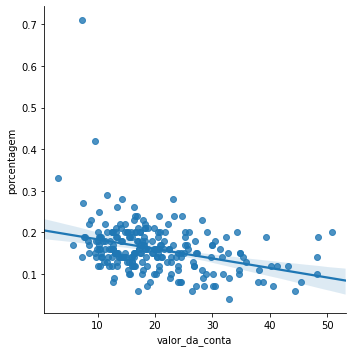

In [32]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa


In [33]:
gorjetas.head(
)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [34]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [35]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


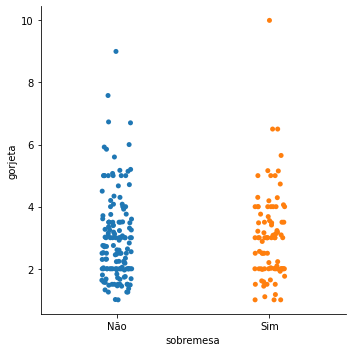

In [36]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

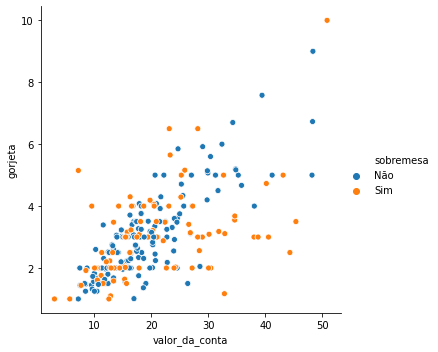

In [37]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

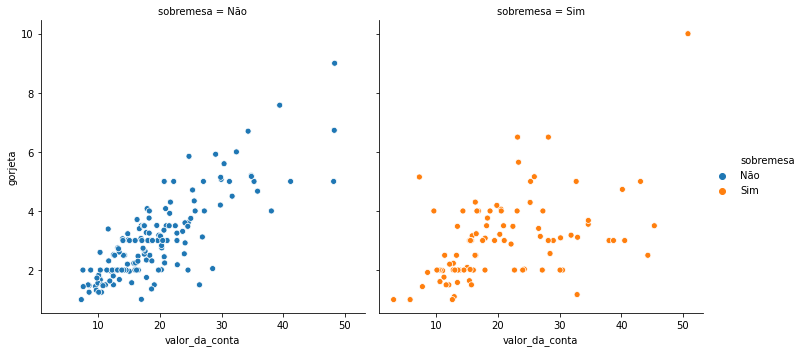

In [38]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

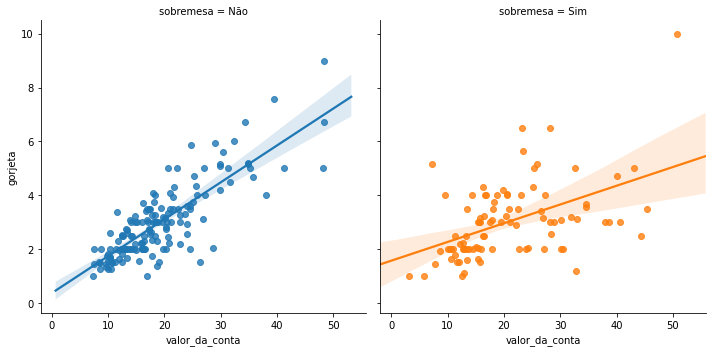

In [39]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col = 'sobremesa', hue='sobremesa', data=gorjetas)

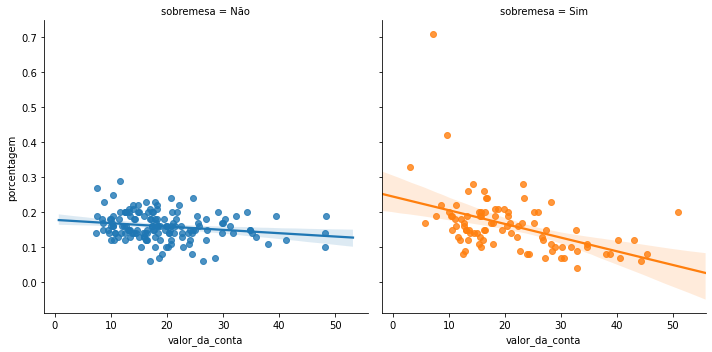

In [40]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col = 'sobremesa', hue='sobremesa', data=gorjetas)

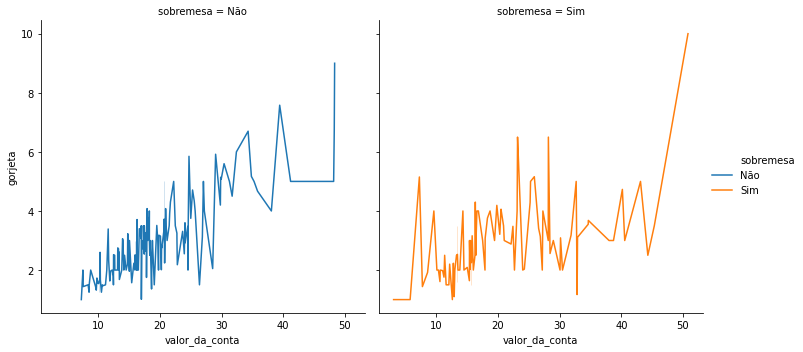

In [41]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

**Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**


##Teste de hipótese



**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [42]:
from scipy.stats import ranksums

In [43]:
sobremesa=gorjetas.query("sobremesa == 'Sim'").porcentagem

In [44]:
sem_sobremesa=gorjetas.query("sobremesa == 'Não'").porcentagem

In [45]:
r=ranksums(sobremesa, sem_sobremesa)

In [46]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**Como pvalue > 0.5, aceitamos H<sup>null</sup>**

# Análise 3 - Dia da semana


In [47]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

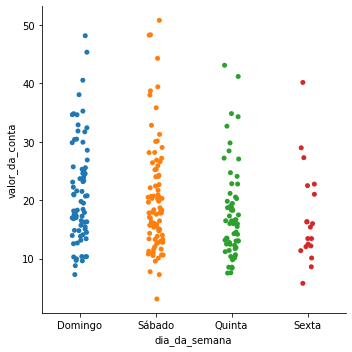

In [48]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)
#plot categórico


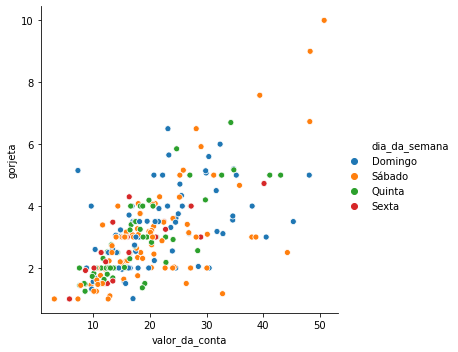

In [49]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

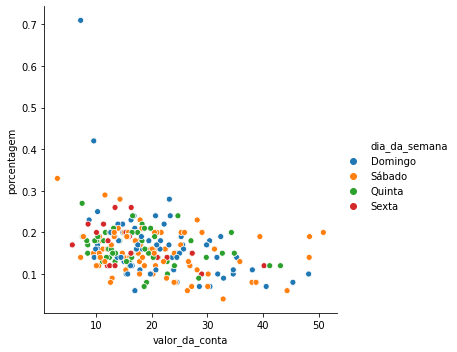

In [50]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

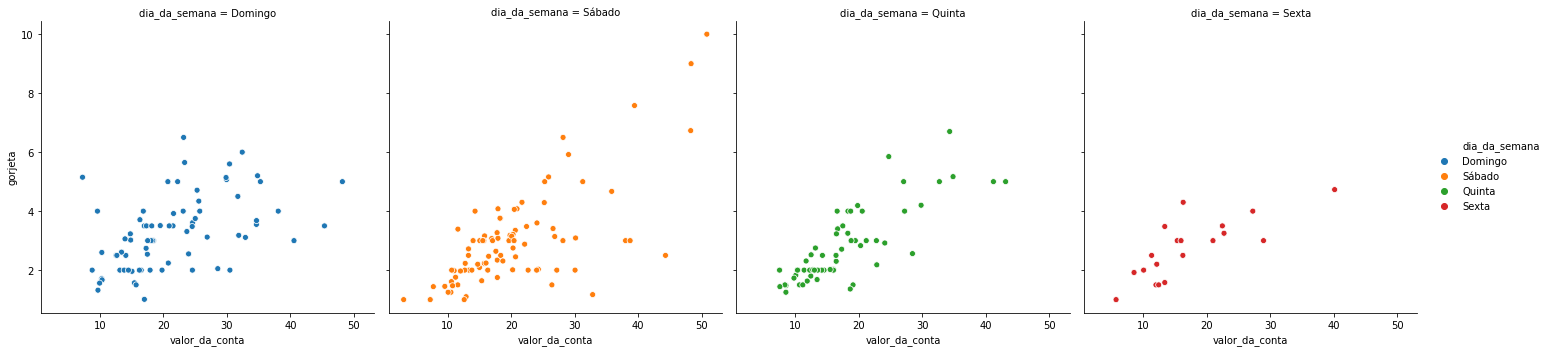

In [51]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

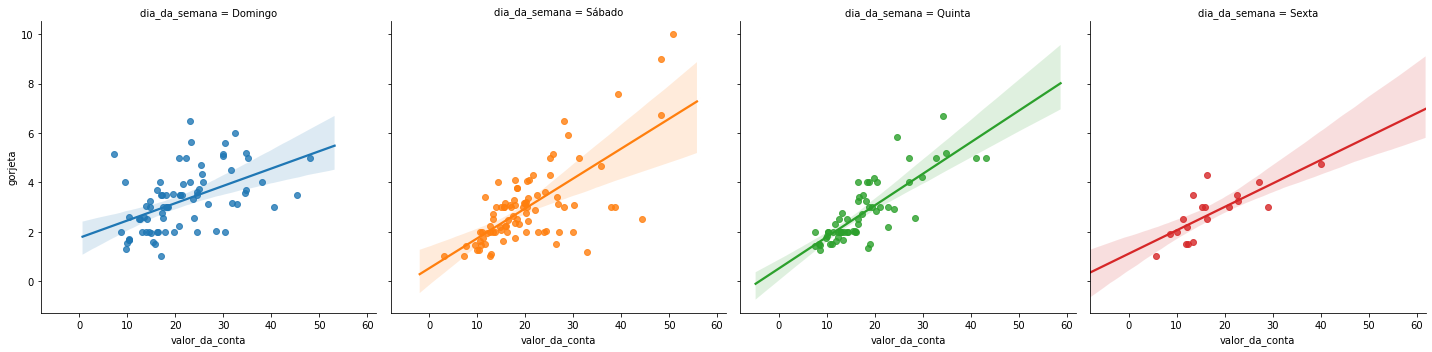

In [52]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [54]:
media_geral_gorjetas= gorjetas.gorjeta.mean()

In [55]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [57]:
gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [58]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [60]:
print('Frequencia dos dias')
gorjetas.dia_da_semana.value_counts()

Frequencia dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

**H<sup>null</sup>**
**A distribuição da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
**A distribuição da conta não é igual no sábado e no domingo**

In [62]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [65]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [66]:
ranksums(valor_conta_domingo, valor_conta_sabado)
#Aceitaríamos a Hipótese alternativa caso o valor de "pvalue" fosse menor que 0.05, que não acontece

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

#Análise 4 - Hora do dia


In [67]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

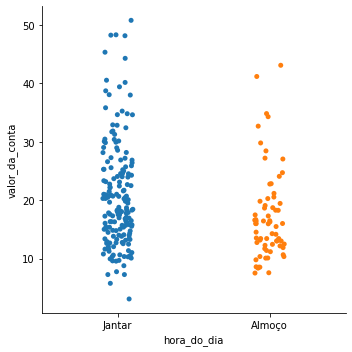

In [68]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

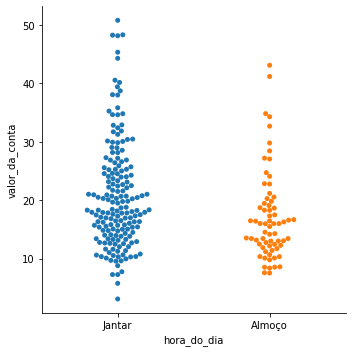

In [70]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm',data=gorjetas)
#melhor visualização dos pontos

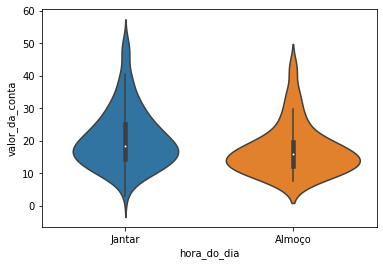

In [72]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

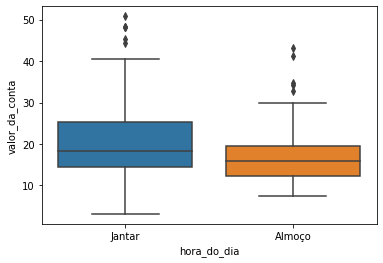

In [73]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [74]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

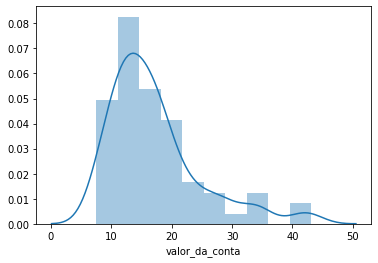

In [75]:
sns.distplot(almoco)

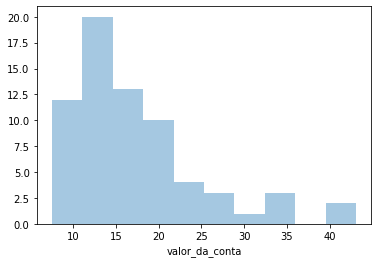

In [76]:
sns.distplot(almoco, kde=False)

In [77]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta


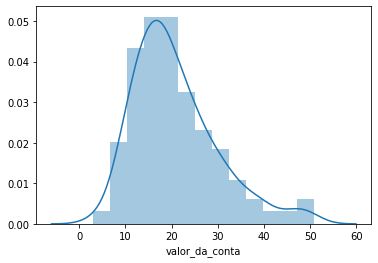

In [78]:
sns.distplot(jantar)

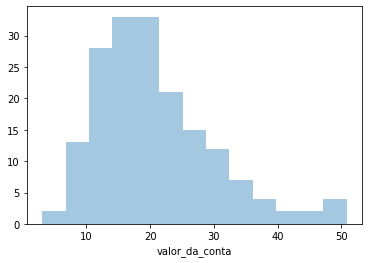

In [79]:
sns.distplot(jantar, kde = False)

In [80]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese

**H<sup>null</sup>**
**A distribuição da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
**A distribuição da conta não é igual no jantar e no almoço**

In [81]:
ranksums(jantar, almoco)
#Aqui a hipotese alternatica é aceita

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

## Teste de Hipótese 2

**H<sup>null</sup>**
**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [86]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [84]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [88]:
ranksums(porcentagem_almoco, porcentagem_jantar)
#mantemos a hipótese nula

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)